In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline


nc_filename=glob.glob('*_ptrc_T*.nc')
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['Off_1y_20020101_20021231_ptrc_T.nc', 'CindyOff_1d_20100101_20100101_ptrc_T.nc', 'Off_1m_20020101_20020201_ptrc_T.nc', 'Off_1m_20020101_20021231_ptrc_T.nc']


In [2]:
ptrc=nc.Dataset(nc_filename[1])
ptrc.variables

OrderedDict([(u'nav_lon', <netCDF4.Variable at 0x7fec1a25ecc8>),
             (u'nav_lat', <netCDF4.Variable at 0x7fec1a25ed60>),
             (u'deptht', <netCDF4.Variable at 0x7fec1a25edf8>),
             (u'time_counter', <netCDF4.Variable at 0x7fec1a25ee90>),
             (u'time_counter_bnds', <netCDF4.Variable at 0x7fec1a25ef28>),
             (u'TR_7', <netCDF4.Variable at 0x7fec195d4050>),
             (u'TR_8', <netCDF4.Variable at 0x7fec195d40e8>),
             (u'TR_9', <netCDF4.Variable at 0x7fec195d4180>),
             (u'TR_10', <netCDF4.Variable at 0x7fec195d4218>)])

In [21]:
nav_lon=ptrc.variables['nav_lon'][:]
nav_lat=ptrc.variables['nav_lat'][:]
TR_7=ptrc.variables['TR_7'][:]
TR_9=ptrc.variables['TR_9'][:]
TR_8=ptrc.variables['TR_8'][:]
TR_7=np.ma.masked_where(TR_7<= 0, TR_7)
TR_8=np.ma.masked_where(TR_8<= 0, TR_8)
TR_9=np.ma.masked_where(TR_9<= 0, TR_9)
TR_7=np.ma.masked_where(TR_7>= 1, TR_7)
TR_8=np.ma.masked_where(TR_8>= 1, TR_8)
TR_9=np.ma.masked_where(TR_9>= 1, TR_9)
TR_7=np.ma.masked_where(np.isnan(TR_7),TR_7)
TR_8=np.ma.masked_where(np.isnan(TR_8),TR_8)
TR_9=np.ma.masked_where(np.isnan(TR_9),TR_9)
#ice=ptrc.variables['ice_cover'][:]
#u=ptrc.variables['uoce'][:]
#v=ptrc.variables['voce'][:]
#w=ptrc.variables['woce'][:]

lonlim=[-180, 180]
latlim=[-78, 89]
print TR_7.shape
print nav_lat.shape

(1, 50, 800, 544)
(800, 544)


In [10]:
TR_7[0,20,:,:]

masked_array(data =
 [[0.0003510991227813065 0.000353652227204293 0.0003562190686352551 ...,
  0.0020520149264484644 0.0020525448489934206 0.002053056377917528]
 [0.00035118754021823406 0.0003537405573297292 0.00035630722413770854 ...,
  0.0020520759280771017 0.0020526060834527016 0.0020531178452074528]
 [0.00035127639421261847 0.0003538292949087918 0.00035639587440527976 ...,
  0.0020521371625363827 0.002052667550742626 0.0020531793124973774]
 ..., 
 [0.00030456663807854056 0.0003030783263966441 0.00030160037567839026 ...,
  0.0016190767055377364 0.0016221546102315187 0.0016252223867923021]
 [0.0003041322052013129 0.00030264101224020123 0.00030116018024273217 ...,
  0.0016178596997633576 0.0016209492459893227 0.001624028431251645]
 [0.00030369957676157355 0.00030220544431358576 0.0003007217310369015 ...,
  0.0016166537534445524 0.0016197549412027001 0.0016228454187512398]],
             mask =
 [[False False False ..., False False False]
 [False False False ..., False False False]
 [F

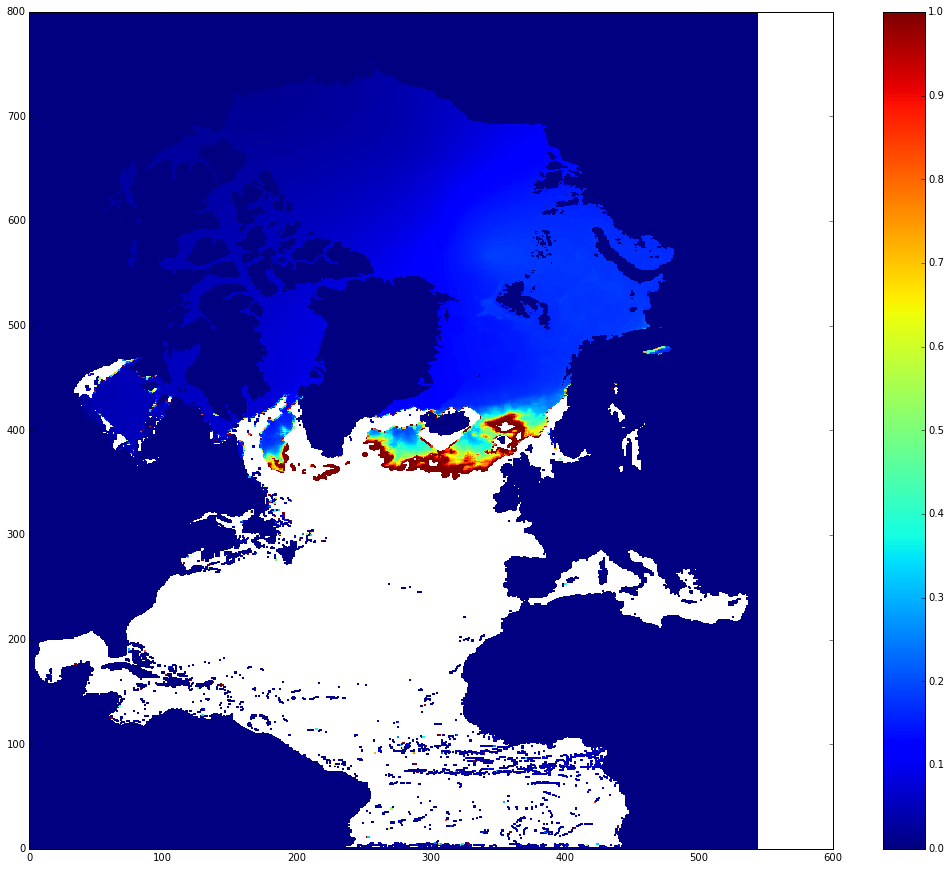

In [19]:
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111)
plt.pcolor(TR_7[0,20,:,:])
plt.colorbar()
plt.clim([0,1])
plt.show()

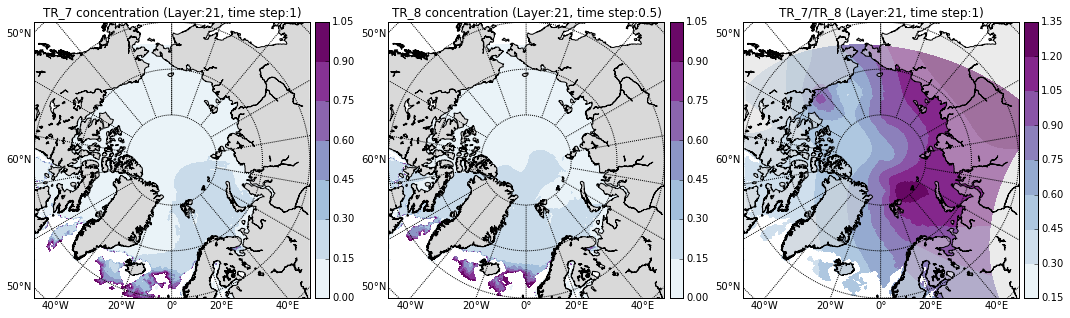

In [22]:
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(133)
# Some 2D arrays to plot (time,x,y)
data=TR_7#/1e6
data2=TR_8#/1e6
i=0
layer=20

#mask data in fram strait
#for k in range(len(nav_lon[:,0])):
#    for j in range(len(nav_lon[0,:])):
#        if (nav_lon[k,j]<=0) and (nav_lon[k,j]>=-20):
#            data2[i,layer,k,j]=np.ma.masked
#        if (nav_lon[k,j]>=0) and (nav_lon[k,j]<=20):
#            data2[i,layer,k,j]=np.ma.masked
#        if (nav_lon[k,j]<=0) and (nav_lon[k,j]>=-20):
#            data[i,layer,k,j]=np.ma.masked
#        if (nav_lon[k,j]>=0) and (nav_lon[k,j]<=20):
#            data[i,layer,k,j]=np.ma.masked

m = Basemap(projection='npstere',boundinglat=60,lon_0=-0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x, y = m(nav_lon, nav_lat)
cs=m.contourf(x,y,data[i,layer,:,:]/data2[i,layer,:,:],cmap=plt.cm.BuPu)    
plt.title('TR_7/TR_8 (Layer:%s, time step:%s)'%(layer+1,i+1))
cbar = m.colorbar(cs,location='right',pad="2%")


#fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(131)
m = Basemap(projection='npstere',boundinglat=60,lon_0=-0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x, y = m(nav_lon, nav_lat)
#cs=m.contourf(x,y,ice[i,:,:],cmap=plt.cm.bone)
cs=m.contourf(x,y,data[i,layer,:,:],cmap=plt.cm.BuPu)  
cbar = m.colorbar(cs,location='right',pad="2%")
plt.title('TR_7 concentration (Layer:%s, time step:%s)'%(layer+1,i+1))


#fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(132)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-90.,90.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,20.),labels=[0, 0, 0, 1],zorder=3)
x, y = m(nav_lon, nav_lat)

cs=m.contourf(x,y,data2[i,layer,:,:],cmap=plt.cm.BuPu)
cbar = m.colorbar(cs,location='right',pad="2%")
plt.title('TR_8 concentration (Layer:%s, time step:%s)'%(layer+1,i+0.5))
#Q=m.quiver(x, y, u[i,layer,:,:], v[i,layer,:,:],scale=0.8)
  #smaller the number, longer the line
#Qlabel=plt.quiverkey(Q, 0.15, 0.1, 0.03, '0.03 m/s', labelpos='N') # width, height, scale, label, position
#ax.set_title('currents (Layer=95m, Time=1)', fontsize=12)

pl.show()

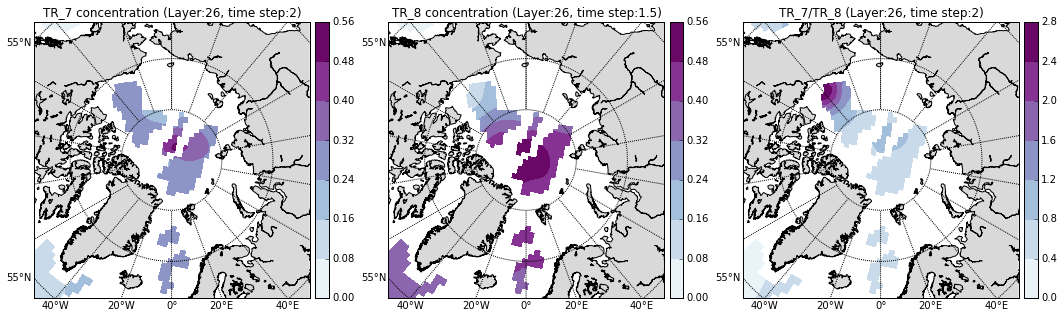

In [15]:
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(133)
# Some 2D arrays to plot (time,x,y)
data=TR_7#/1e6
data2=TR_8#/1e6
i=1
layer=25
m = Basemap(projection='npstere',boundinglat=63,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x, y = m(nav_lon, nav_lat)

cs=m.contourf(x,y,data[i,layer,:,:]/data2[i,layer,:,:],cmap=plt.cm.BuPu)    
plt.title('TR_7/TR_8 (Layer:%s, time step:%s)'%(layer+1,i+1))
cbar = m.colorbar(cs,location='right',pad="2%")
#pl.show()


#fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(131)
m = Basemap(projection='npstere',boundinglat=63,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x, y = m(nav_lon, nav_lat)
#cs=m.contourf(x,y,ice[i,:,:],cmap=plt.cm.bone)
cs=m.contourf(x,y,data[i,layer,:,:],cmap=plt.cm.BuPu)  
cbar = m.colorbar(cs,location='right',pad="2%")
plt.title('TR_7 concentration (Layer:%s, time step:%s)'%(layer+1,i+1))
#plt.title("Sea ice concentration")
#pl.show()


#fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(132)
m = Basemap(projection='npstere',boundinglat=63,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x, y = m(nav_lon, nav_lat)
cs=m.contourf(x,y,data2[i,layer,:,:],cmap=plt.cm.BuPu)
cbar = m.colorbar(cs,location='right',pad="2%")
plt.title('TR_8 concentration (Layer:%s, time step:%s)'%(layer+1,i+0.5))
#Q=m.quiver(x, y, u[i,layer,:,:], v[i,layer,:,:],scale=0.8)
  #smaller the number, longer the line
#Qlabel=plt.quiverkey(Q, 0.15, 0.1, 0.03, '0.03 m/s', labelpos='N') # width, height, scale, label, position
#ax.set_title('currents (Layer=95m, Time=1)', fontsize=12)

pl.show()

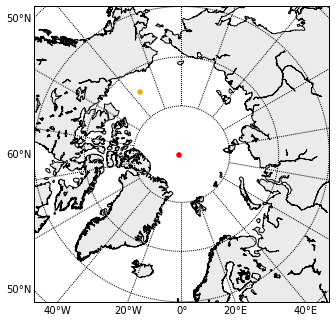

In [9]:
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(133)
# Some 2D arrays to plot (time,x,y)
data=TR_7#/1e6
data2=TR_8#/1e6
i=0
layer=25

#mask data in fram strait
#for k in range(len(nav_lon[:,0])):
#    for j in range(len(nav_lon[0,:])):
#        if (nav_lon[k,j]<=0) and (nav_lon[k,j]>=-20):
#            data2[i,layer,k,j]=np.ma.masked
#        if (nav_lon[k,j]>=0) and (nav_lon[k,j]<=20):
#            data2[i,layer,k,j]=np.ma.masked
#        if (nav_lon[k,j]<=0) and (nav_lon[k,j]>=-20):
#            data[i,layer,k,j]=np.ma.masked
#        if (nav_lon[k,j]>=0) and (nav_lon[k,j]<=20):
#            data[i,layer,k,j]=np.ma.masked

m = Basemap(projection='npstere',boundinglat=60,lon_0=-0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x, y = m(nav_lon, nav_lat)
m.scatter(x[600,300],y[600,300],color='red')
m.scatter(x[700,200],y[700,200],color='orange')
plt.show()